In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# ESTRUTURA PROPOSTA:


###    1. Introdução

###    2. Project Understanding

###    3. Data Understanding
#####  3.1. Descrição
#####  3.2. EDA
#####  3.3. Correlações
#####  3.4. Qualidade dos dados

###    4. Data Preparation
#####  4.1. Limpeza
#####  4.2. Transformações
#####  4.3. Feature Engineering

###    5. Modeling
#####  5.1. Clustering
#####  5.2. Modelos de previsão
#####  5.3. Normalização

###    6. Evaluation

###    7. Conclusion

###    8. References

 # 3. Data Understanding
 
O dataset utilizado corresponde ao registo contínuo de consumos energéticos de vários edifícios municipais da Maia, recolhidos através de sistemas de telemetria. As medições são efetuadas em intervalos regulares de 15 minutos, permitindo caracterizar com grande detalhe os padrões de utilização energética ao longo do tempo.
 ## 3.1 Descrição do Dataset
Cada registo do Dataset, incluí:
 - Código do local (CPE);
 - Timestamp da medição (tstamp);
 - DadosDeConsumo (kW/h);
 - Potência Ativa (kW/h);
 - Potência Reativa Indutiva (VAR);
 - Potência Reativa Capacitiva (VAR).



In [2]:
df = pl.read_csv(
    "consumo15m_11_2025.csv",
    null_values="NULL"
)

df

CPE,tstamp,DadosdeConsumo,PotActiva,PotReactIndut,PotReactCapac
str,str,str,f64,str,str
"""PT0002000089069203YG""","""2022-12-31 00:15:00""",null,0.296,null,null
"""PT0002000089069203YG""","""2022-12-31 00:30:00""",null,0.292,null,null
"""PT0002000089069203YG""","""2022-12-31 00:45:00""",null,0.284,null,null
"""PT0002000089069203YG""","""2022-12-31 01:00:00""",null,0.28,null,null
"""PT0002000089069203YG""","""2022-12-31 01:15:00""",null,0.272,null,null
…,…,…,…,…,…
"""PT0002000110607652SB""","""2025-04-30 23:00:00""",null,3.0,"""1.000""","""0.000"""
"""PT0002000110607652SB""","""2025-04-30 23:15:00""",null,3.0,"""2.000""","""0.000"""
"""PT0002000110607652SB""","""2025-04-30 23:30:00""",null,3.0,"""1.000""","""0.000"""



# 3.2 Limpeza Inicial e Conversão de Tipos
 Antes de proceder à análise, é essencial garantir:
 - conversão do timestamp para formato datetime;
 - conversão das colunas numéricas para float;
 - eliminação/tratamento dos valores "NULL".
 
Estas etapas são fundamentais, pois garantem a consistência do dataset e permitem realizar operações estatísticas e temporais de forma correta. Após esta limpeza, os dados ficam prontos para uma exploração detalhada e fiável.

In [3]:
df = df.with_columns(
    pl.col("tstamp").str.to_datetime("%Y-%m-%d %H:%M:%S")
)

df = df.with_columns([
    pl.col("DadosdeConsumo").cast(pl.Float64),
    pl.col("PotReactIndut").cast(pl.Float64),
    pl.col("PotReactCapac").cast(pl.Float64),
])

df.dtypes

[String,
 Datetime(time_unit='us', time_zone=None),
 Float64,
 Float64,
 Float64,
 Float64]

# 3.3 Análise Descritiva e Visualização

Nesta fase, são calculadas as principais métricas estatísticas, como média, desvio padrão, valores mínimos e máximos. Esta análise, complementada por histogramas, permite uma compreensão inicial da distribuição e da escala das variáveis, sendo fundamental para detetar anomalias, como outliers ou valores inesperados.

In [4]:
df.describe()

statistic,CPE,tstamp,DadosdeConsumo,PotActiva,PotReactIndut,PotReactCapac
str,str,str,f64,f64,f64,f64
"""count""","""5940182""","""5940182""",0.0,5.940182e6,3.66871e6,3.66871e6
"""null_count""","""0""","""0""",5.940182e6,0.0,2.271472e6,2.271472e6
"""mean""",null,"""2024-04-15 22:32:26.636113""",null,8.093966,1.715323,0.65256
"""std""",null,null,null,23.018327,3.38557,1.662369
"""min""","""PT0002000032936306KX""","""2022-12-31 00:15:00""",null,0.0,0.0,0.0
"""25%""",null,"""2023-09-28 05:00:00""",null,0.12,0.0,0.0
"""50%""",null,"""2024-05-15 14:00:00""",null,2.0,0.0,0.0
"""75%""",null,"""2024-11-08 01:00:00""",null,7.0,2.0,1.0
"""max""","""PT0002000201936109ME""","""2025-05-01 00:00:00""",null,574.0,177.0,124.0


In [5]:
df.describe().transpose(include_header=True, header_name="statistic", column_names="statistic")

statistic,count,null_count,mean,std,min,25%,50%,75%,max
str,str,str,str,str,str,str,str,str,str
"""CPE""","""5940182""","""0""",null,null,"""PT0002000032936306KX""",null,null,null,"""PT0002000201936109ME"""
"""tstamp""","""5940182""","""0""","""2024-04-15 22:32:26.636113""",null,"""2022-12-31 00:15:00""","""2023-09-28 05:00:00""","""2024-05-15 14:00:00""","""2024-11-08 01:00:00""","""2025-05-01 00:00:00"""
"""DadosdeConsumo""","""0.0""","""5940182.0""",null,null,null,null,null,null,null
"""PotActiva""","""5940182.0""","""0.0""","""8.093966159622719""","""23.018326816845473""","""0.0""","""0.12""","""2.0""","""7.0""","""574.0"""
"""PotReactIndut""","""3668710.0""","""2271472.0""","""1.7153228246440848""","""3.385570409509408""","""0.0""","""0.0""","""0.0""","""2.0""","""177.0"""
"""PotReactCapac""","""3668710.0""","""2271472.0""","""0.6525601641994052""","""1.6623693221226727""","""0.0""","""0.0""","""0.0""","""1.0""","""124.0"""


In [6]:
df.select(pl.col("CPE").n_unique())

CPE
u32
91


O conjunto de dados contém 91 CPEs distintos.

In [7]:
# missing por coluna
df.null_count()

CPE,tstamp,DadosdeConsumo,PotActiva,PotReactIndut,PotReactCapac
u32,u32,u32,u32,u32,u32
0,0,5940182,0,2271472,2271472


In [8]:
# percentagem de zeros na PotActiva
total = df.height
zeros = df.filter(pl.col("PotActiva") == 0).height
print("Percentagem de PotActiva = 0:", zeros / total * 100, "%")

Percentagem de PotActiva = 0: 14.897220320858857 %


A análise inicial revelou que a variável DadosdeConsumo se encontra totalmente nula, pelo que não será útil na modelação inicial.
Verificou-se ainda que cerca de 15% dos valores de PotActiva são zero, o que indica longos períodos de baixa atividade energética.
As correlações entre variáveis energéticas são fracas, sugerindo que estas captam fenómenos distintos, o que é positivo para feature engineering e clustering.

## Análise de Histogramas


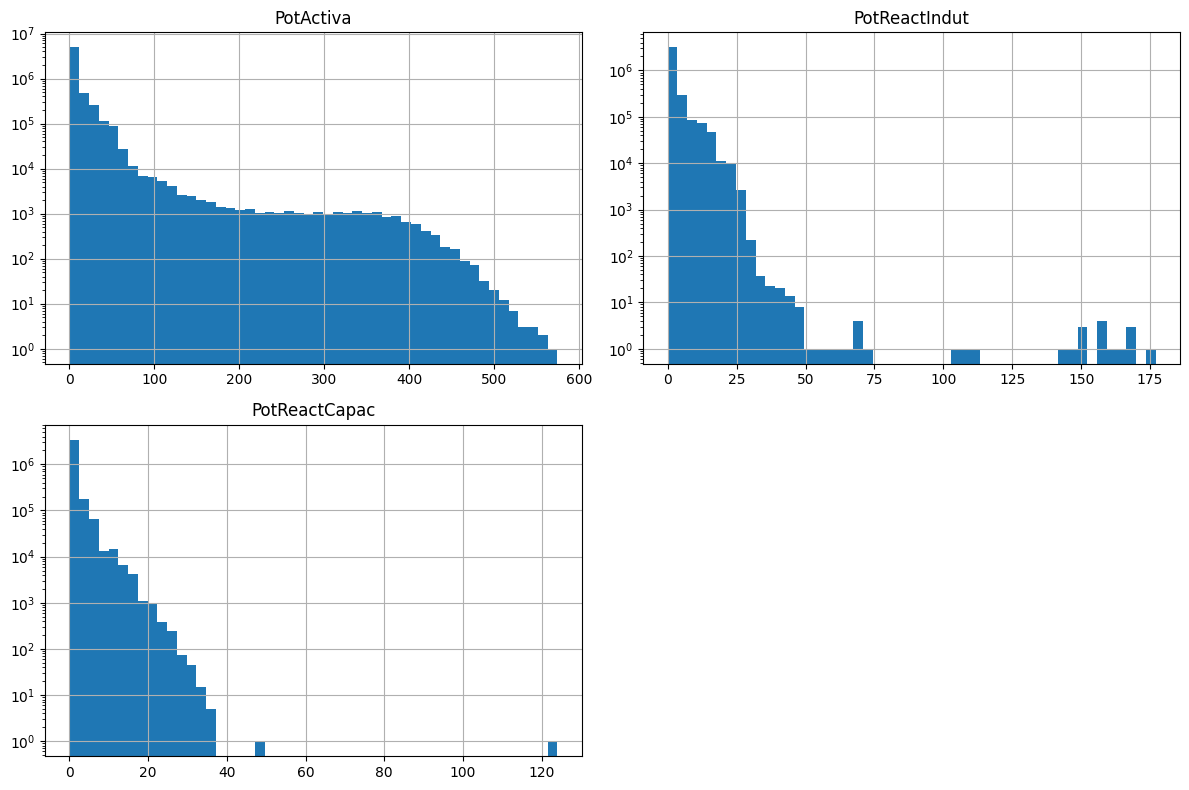

In [17]:
histo = df.select([
    "PotActiva",
    "PotReactIndut",
    "PotReactCapac"
]).to_pandas()

histo.hist(bins=50, figsize=(12,8), log=True)
plt.tight_layout()
plt.yscale('log')
plt.show()

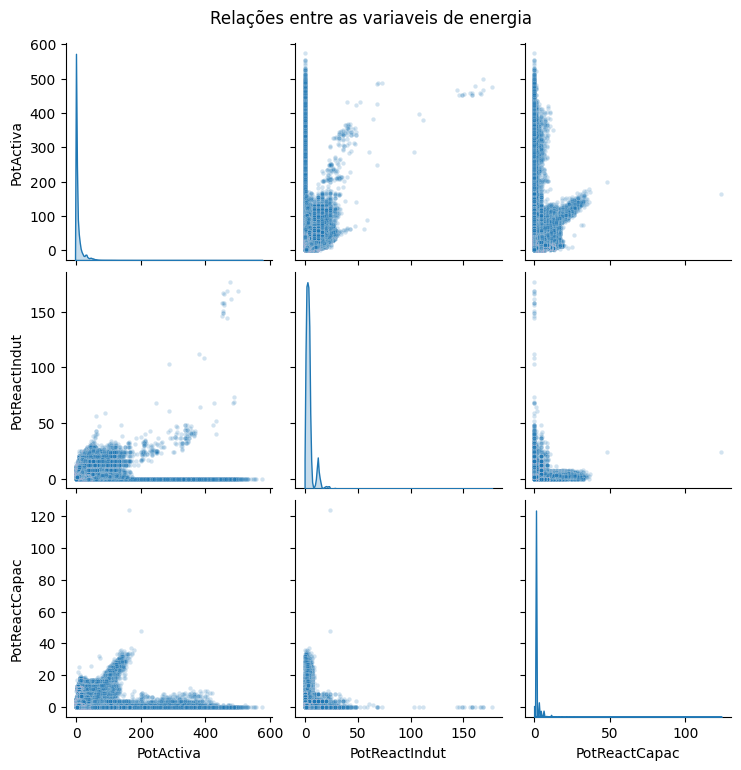

In [10]:
sns.pairplot(
    histo,
    diag_kind="kde",
    plot_kws={"alpha": 0.2, "s": 10} 
)
plt.suptitle("Relações entre as variaveis de energia", y=1.02)
plt.show()

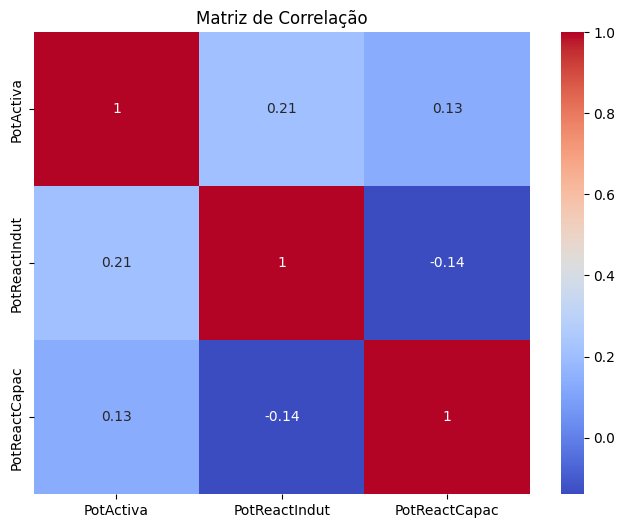

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(histo.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

A matriz de correlação mostra que as três variáveis energéticas analisadas têm uma relação fraca entre si. A potência ativa apresenta apenas uma correlação ligeiramente positiva com a potência reativa indutiva (0.21) e uma ainda mais baixa com a componente capacitiva (0.13). Isto significa que, mesmo quando a potência ativa aumenta, as componentes reativas nem sempre acompanham esse aumento de forma clara ou consistente. Também se observa uma correlação fraca e negativa entre a potência reativa indutiva e capacitiva (-0.14).
No geral, estes valores mostram que as variáveis não são redundantes e captam dimensões distintas do comportamento elétrico dos edifícios, o que as torna úteis para as fases seguintes de preparação e modelação dos dados.

## Análise Temporal
Como o dataset inclui timestamps, é útil analisar o comportamento das variáveis ao longo do tempo permitindo:
<p>-identificar padrões diários e semanais;<p>
-ajudar a perceber períodos de maior e menor atividade; <p>
-facilitar a deteção de picos, anomalias e variações sazonais;



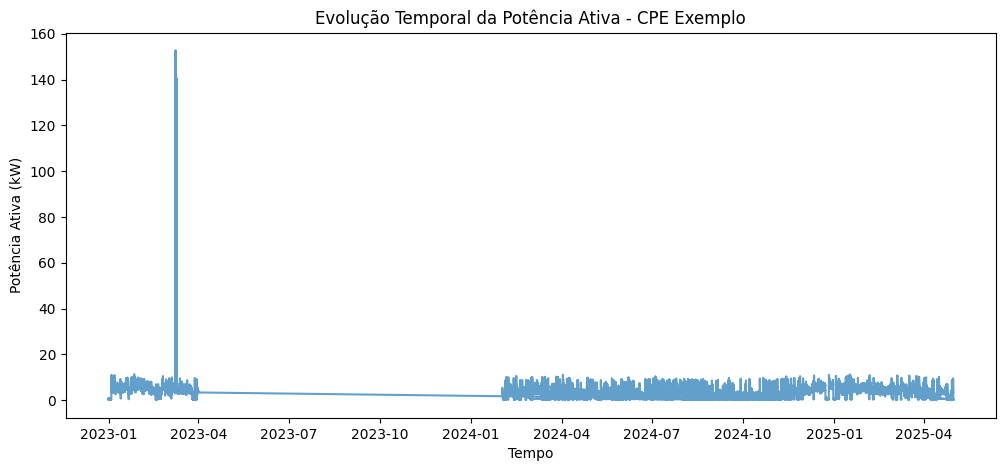

In [12]:
sample_cpe = df.filter(pl.col("CPE") == df["CPE"][0])  # escolher 1 edificio
pdf = sample_cpe.to_pandas()

plt.figure(figsize=(12,5))
plt.plot(pdf["tstamp"], pdf["PotActiva"], alpha=0.7)
plt.title("Evolução Temporal da Potência Ativa - CPE Exemplo")
plt.xlabel("Tempo")
plt.ylabel("Potência Ativa (kW)")
plt.show()

### Perfis Diários, semanais e mensais

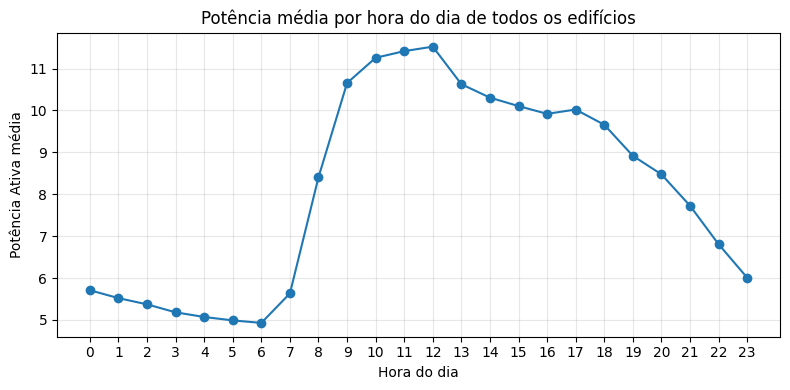

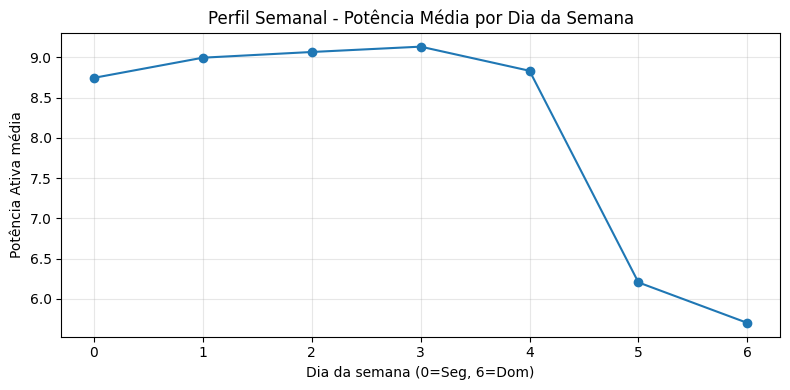

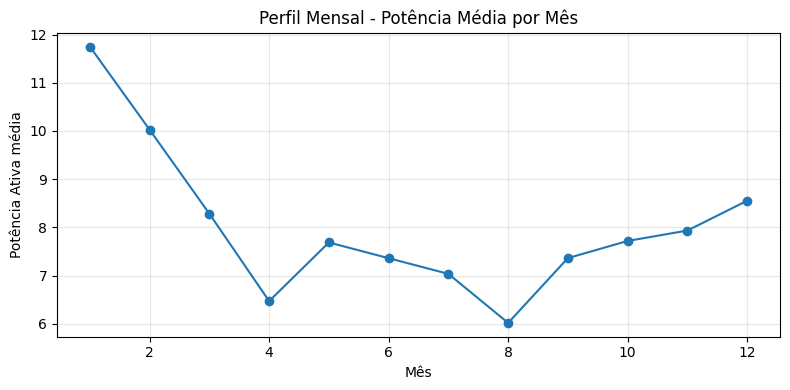

In [13]:
# Perfil Diário
pdf = df.to_pandas()
pdf["hour"] = pdf["tstamp"].dt.hour

hourly = pdf.groupby("hour")["PotActiva"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(hourly["hour"], hourly["PotActiva"], marker="o")
plt.xlabel("Hora do dia")
plt.ylabel("Potência Ativa média")
plt.title("Potência média por hora do dia de todos os edifícios")
plt.xticks(range(0,24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Perfil Semanal
pdf["weekday"] = pdf["tstamp"].dt.weekday  

weekly = pdf.groupby("weekday")["PotActiva"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(weekly["weekday"], weekly["PotActiva"], marker="o")
plt.xlabel("Dia da semana (0=Seg, 6=Dom)")
plt.ylabel("Potência Ativa média")
plt.title("Perfil Semanal - Potência Média por Dia da Semana")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Perfil Mensal
pdf["month"] = pdf["tstamp"].dt.month

monthly = pdf.groupby("month")["PotActiva"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(monthly["month"], monthly["PotActiva"], marker="o")
plt.xlabel("Mês")
plt.ylabel("Potência Ativa média")
plt.title("Perfil Mensal - Potência Média por Mês")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



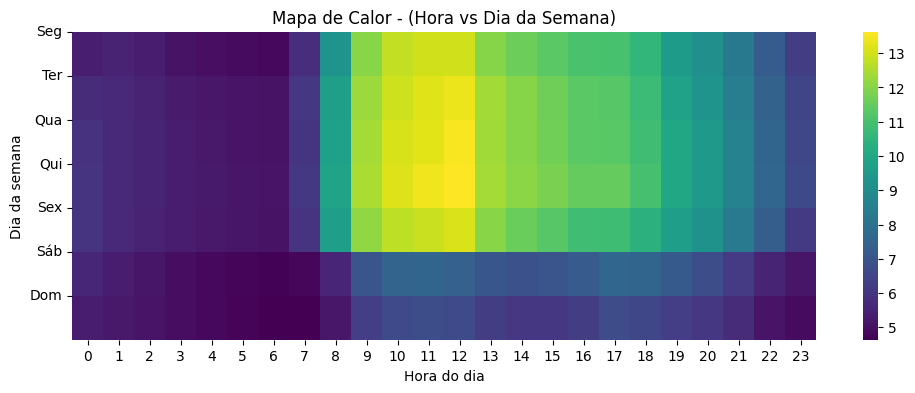

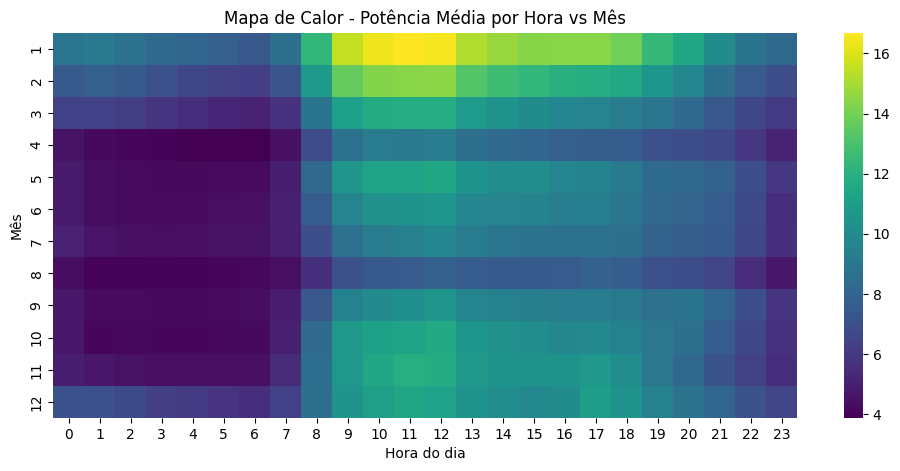

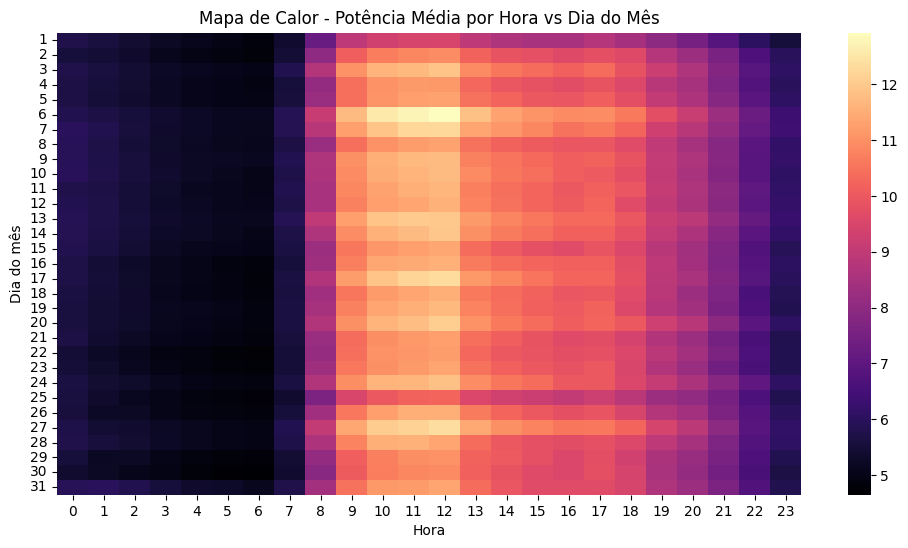

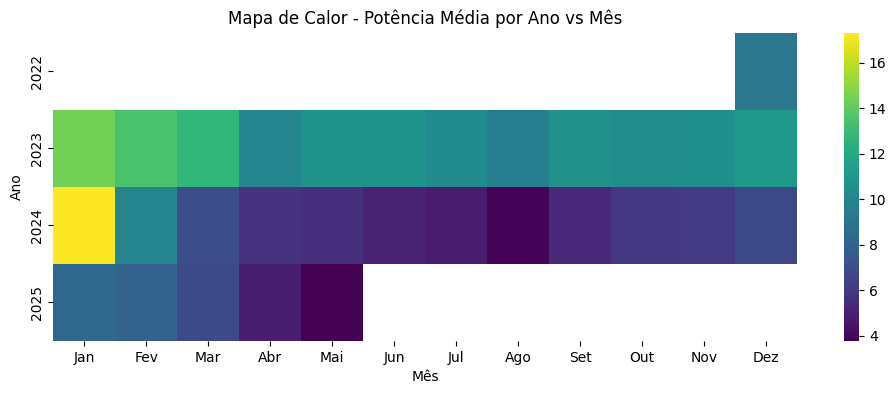

In [14]:

pdf["year"] = pdf["tstamp"].dt.year
pdf["month"] = pdf["tstamp"].dt.month
pdf["weekday"] = pdf["tstamp"].dt.weekday
pdf["hour"] = pdf["tstamp"].dt.hour
pdf["day"] = pdf["tstamp"].dt.day
pdf["year"] = pdf["tstamp"].dt.year
pivot = pdf.pivot_table(
    values="PotActiva",
    index="weekday",
    columns="hour",
    aggfunc="mean"
)

plt.figure(figsize=(12,4))
sns.heatmap(pivot, cmap="viridis")

# Títulos
plt.title("Mapa de Calor - (Hora vs Dia da Semana)")
plt.xlabel("Hora do dia")
plt.ylabel("Dia da semana")

# Substituir 0..6 pelos nomes
dias = ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"]
plt.yticks(ticks=range(7), labels=dias, rotation=0)

pivot_month_hour = pdf.pivot_table(
    values="PotActiva",
    index="month",
    columns="hour",
    aggfunc="mean"
)

plt.figure(figsize=(12,5))
sns.heatmap(pivot_month_hour, cmap="viridis")
plt.title("Mapa de Calor - Potência Média por Hora vs Mês")
plt.xlabel("Hora do dia")
plt.ylabel("Mês")
plt.show()


pivot_day_hour = pdf.pivot_table(
    values="PotActiva",
    index="day",
    columns="hour",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_day_hour, cmap="magma")
plt.title("Mapa de Calor - Potência Média por Hora vs Dia do Mês")
plt.xlabel("Hora")
plt.ylabel("Dia do mês")
plt.show()



pivot_year_month = pdf.pivot_table(
    values="PotActiva",
    index="year",
    columns="month",
    aggfunc="mean"
)
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
         "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

plt.figure(figsize=(12,4))
sns.heatmap(pivot_year_month, cmap="viridis", 
            xticklabels=meses)
plt.title("Mapa de Calor - Potência Média por Ano vs Mês")
plt.xlabel("Mês")
plt.ylabel("Ano")
plt.show()


Top 3 CPE com maior consumo total: ['PT0002000078441876HB', 'PT0002000100113293JT', 'PT0002000068856781NM']


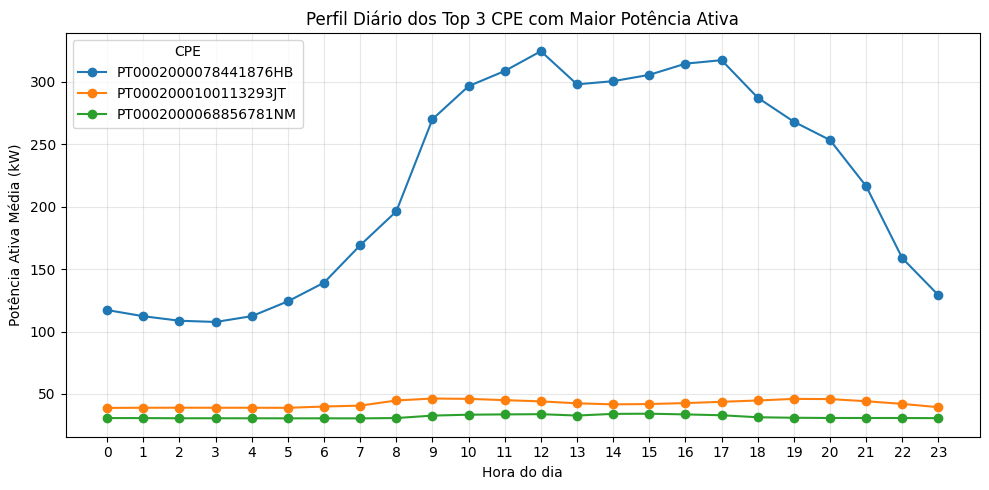

In [15]:
top3 = (
    df.group_by("CPE")
      .agg(pl.col("PotActiva").sum().alias("total"))
      .sort("total", descending=True)
      .head(3)
      .to_pandas()
)

top3_list = top3["CPE"].tolist()
print("Top 3 CPE com maior consumo total:", top3_list)

# Filtrar apenas CPE do Top 3
pdf_top = pdf[pdf["CPE"].isin(top3_list)]

perfis = (
    pdf_top.groupby(["CPE", "hour"])["PotActiva"]
           .mean()
           .reset_index()
)

# Gráfico dos perfis diários
plt.figure(figsize=(10,5))

for cpe in top3_list:
    subset = perfis[perfis["CPE"] == cpe]
    plt.plot(subset["hour"], subset["PotActiva"], marker='o', label=cpe)

plt.title("Perfil Diário dos Top 3 CPE com Maior Potência Ativa")
plt.xlabel("Hora do dia")
plt.ylabel("Potência Ativa Média (kW)")
plt.xticks(range(24))
plt.grid(alpha=0.3)
plt.legend(title="CPE")
plt.tight_layout()
plt.show()